#  What is BERT?
* BERT stands for Bidirectional Encoders Representations from Transformers.
* Bidirectional - to understand the text you’re looking you’ll have to look back (at the previous words) and forward (at the next words)
* Transformers - The Attention Is All You Need paper presented the Transformer model. The Transformer reads entire sequences of tokens at once. In a sense, the model is non-directional, while LSTMs read sequentially (left-to-right or right-to-left). The attention mechanism allows for learning contextual relations between words (e.g. his in a sentence refers to Jim).
* (Pre-trained) contextualized word embeddings - The ELMO paper introduced a way to encode words based on their meaning/context. Nails has multiple meanings - fingernails and metal nails.



In [6]:
import numpy as np
import pandas as pd

import os

for dirname, _, filenames in os.walk('C:\\Users\\RAJAS BHARAMBE\\Desktop\\Machine Learning\\Projects_ML\\tweets-sentiment-analysis-using-bert-master'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# We can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\RAJAS BHARAMBE\Desktop\Machine Learning\Projects_ML\tweets-sentiment-analysis-using-bert-master\README.md
C:\Users\RAJAS BHARAMBE\Desktop\Machine Learning\Projects_ML\tweets-sentiment-analysis-using-bert-master\sentiment-analysis-using-bert.ipynb
C:\Users\RAJAS BHARAMBE\Desktop\Machine Learning\Projects_ML\tweets-sentiment-analysis-using-bert-master\smile-annotations-final.csv
C:\Users\RAJAS BHARAMBE\Desktop\Machine Learning\Projects_ML\tweets-sentiment-analysis-using-bert-master\.git\config
C:\Users\RAJAS BHARAMBE\Desktop\Machine Learning\Projects_ML\tweets-sentiment-analysis-using-bert-master\.git\description
C:\Users\RAJAS BHARAMBE\Desktop\Machine Learning\Projects_ML\tweets-sentiment-analysis-using-bert-master\.git\HEAD
C:\Users\RAJAS BHARAMBE\Desktop\Machine Learning\Projects_ML\tweets-sentiment-analysis-using-bert-master\.git\hooks\applypatch-msg.sample
C:\Users\RAJAS BHARAMBE\Desktop\Machine Learning\Projects_ML\tweets-sentiment-analysis-using-bert-master\.git\hooks\com

In [2]:
import torch
from tqdm.notebook import tqdm

In [7]:
df = pd.read_csv("C:\\Users\\RAJAS BHARAMBE\\Desktop\\Machine Learning\\Projects_ML\\tweets-sentiment-analysis-using-bert-master\\smile-annotations-final.csv",
                names = ['Id','Text','Category'])
df.set_index('Id',inplace = True)
df[:4]

,Text,Category
Id,,
611857364396965889,@aandraous @britishmuseum @AndrewsAntonio Merc...,nocode
614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy
614877582664835073,@Sofabsports thank you for following me back. ...,happy


In [8]:
df.Text.iloc[0]

'@aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap'

In [9]:
df.Category.value_counts()

nocode               1572
happy                1137
not-relevant          214
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: Category, dtype: int64

In [10]:
df = df[(df.Category!="nocode")]
df = df[~(df.Category.str.contains("\|"))]
df.Category.value_counts()

happy           1137
not-relevant     214
angry             57
surprise          35
sad               32
disgust            6
Name: Category, dtype: int64

In [11]:
possible_label = df.Category.unique()
dict_label = {}
for index,possible_label in enumerate(possible_label):
    dict_label[possible_label] = index
dict_label

{'happy': 0,
 'not-relevant': 1,
 'angry': 2,
 'disgust': 3,
 'sad': 4,
 'surprise': 5}

In [12]:
df["Label"] = df["Category"].replace(dict_label)
df.head()

,Text,Category,Label
Id,,,
614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,0
614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy,0
614877582664835073,@Sofabsports thank you for following me back. ...,happy,0
611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy,0
611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy,0


C:\Users\RAJAS BHARAMBE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


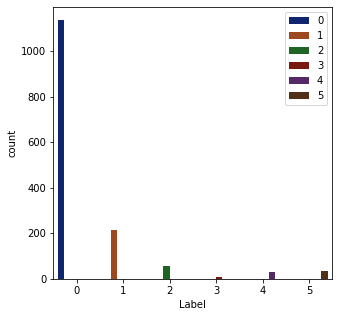

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(df["Label"],hue = df["Label"],palette = 'dark')
plt.legend(loc = 'upper right')
plt.show()